## Linear Regression
### The data set has been taken from https://www.kaggle.com/andonians/random-linear-regression/data

In [1]:
import pandas as pd
import numpy as np

In [26]:
train_df = pd.read_csv('linear_reg_train.csv')
test_df = pd.read_csv('linear_reg_test.csv')

In [28]:
train_df.isna().sum()

x    0
y    1
dtype: int64

#### Train data set has one 'y' value as null, so need to fix that.

In [29]:
train_df[train_df['y'].isnull()]

,x,y
213,3530.157369,NaN


#### Given in the question, the train data set has 'x' values from 0 to 100, so x value should have been 35 
####    and y value should have been 30.157369

In [30]:
train_df.loc[213, 'x'] = 35
train_df.loc[213, 'y'] = 30.157369

In [32]:
train_df.isna().sum()

x    0
y    0
dtype: int64

In [33]:
test_df.isna().sum()

x    0
y    0
dtype: int64

In [46]:
x_test = test_df['x'].values.reshape(-1,1)

In [39]:
train_df.describe()

,x,y
count,700.000000,700.000000
mean,49.992857,49.911608
std,28.939406,29.097996
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.936330
75%,75.000000,74.880631
max,100.000000,108.871618


In [110]:
import matplotlib.pyplot as plt

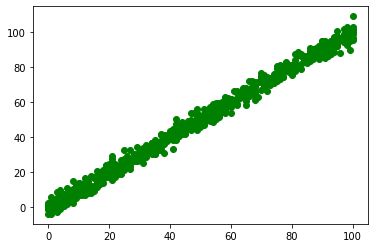

In [35]:
plt.plot(train_df['x'], train_df['y'], 'go')

### 1. Linear Regression from SciKit Library

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [55]:
x = train_df['x'].values.reshape(-1,1)

In [45]:
model.fit(x, train_df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import r2_score

In [49]:
print(r2_score(test_df['y'], y_pred))

0.9887991524195232


### 2. Linear Regression using Cost function

In [65]:
x = train_df['x'].values.reshape(-1,1)
y_train = train_df['y'].values.reshape(-1,1)

In [124]:
n = x.size
alpha = 0.0001

a0 = np.zeros((n,1))
a1 = np.zeros((n,1))

epochs = 0
while (epochs < 1000):
    y = a0 + a1 * x
    error = y - y_train
    mean_sqr_error = np.sum(error**2)
    mean_sqr_error = mean_sqr_error/n
    a0 = a0 - (alpha * 2 * np.sum(error))/n
    a1 = a1 - (alpha * 2 * np.sum(error * x))/n
    epochs+=1
    if(epochs%10 == 0):
        print(mean_sqr_error)
    

7.893381929243044
7.893369027132745
7.893364448047643
7.893359873551578
7.893355303639953
7.89335073830817
7.893346177551638
7.893341621365778
7.893337069746002
7.893332522687739
7.893327980186417
7.893323442237468
7.893318908836327
7.893314379978443
7.893309855659258
7.8933053358742225
7.893300820618797
7.893296309888439
7.893291803678615
7.893287301984794
7.893282804802448
7.893278312127059
7.89327382395411
7.893269340279088
7.8932648610974825
7.893260386404794
7.893255916196523
7.893251450468176
7.893246989215261
7.893242532433297
7.893238080117799
7.893233632264291
7.893229188868302
7.893224749925369
7.893220315431024
7.893215885380812
7.893211459770274
7.893207038594968
7.893202621850443
7.893198209532264
7.8931938016359915
7.893189398157193
7.893184999091444
7.893180604434322
7.893176214181406
7.893171828328284
7.893167446870547
7.893163069803792
7.893158697123612
7.893154328825619
7.893149964905415
7.893145605358616
7.893141250180836
7.893136899367702
7.8931325529148335
7.893128

#### As test data has 300 columns, taking the first 300 values from the a0 and a1

In [92]:
new_a0 = a0[:300]
new_a1 = a1[:300]

In [94]:
y_calc_pred = new_a0 + new_a1 * x_test

In [98]:
print('R2 Score', r2_score(test_df['y'], y_calc_pred))

R2 Score 0.9887694557858232


#### Converting the numpy matrix to array - https://stackoverflow.com/questions/3337301/numpy-matrix-to-array/20765358

In [120]:
c = np.squeeze(np.asarray(new_a0))
m = np.squeeze(np.asarray(new_a1))

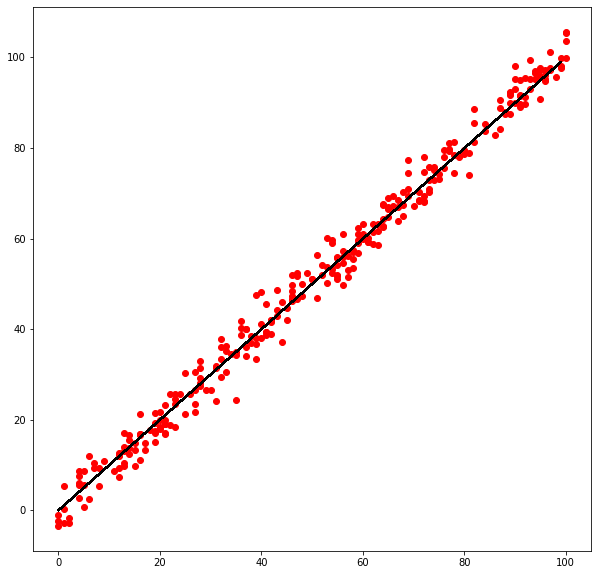

In [122]:
y_plot = []
for i in range(100):
    y_plot.append(c + m * i)
plt.figure(figsize=(10,10))
plt.scatter(x_test, test_df['y'], color = 'red', label = 'GT')
plt.plot(range(len(y_plot)), y_plot, color = 'black', label = 'pred')
#plt.legend()
plt.show()